In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)



GETS THE FIRST FIVE ROWS

In [3]:
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


GETS THE SHAPE OF THE DATAFRAME

In [4]:
df.shape

(344, 7)

if there is no  value or null

In [5]:
df.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [6]:
df.isnull().sum(axis=0) # counts the number of missing values in each column

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
sample_size = int(df.shape[0] * 0.02)
sample_size

6

Mean body_mass_g of the Population

In [9]:
body_mass_g_mean = df['body_mass_g'].mean()
body_mass_g_mean

np.float64(4201.754385964912)

In [10]:
series_mean = df.mean(numeric_only=True)
series_mean

,0
bill_length_mm,43.921930
bill_depth_mm,17.151170
flipper_length_mm,200.915205
body_mass_g,4201.754386


Comparing Population wit Sample mean

In [11]:
sample1 = df.sample(n=sample_size)
sample2 = df.sample(n=sample_size)
sample3 = df.sample(n=sample_size)

In [12]:
sample1.shape

(6, 7)

In [13]:
sample1.mean(numeric_only=True)

,0
bill_length_mm,44.283333
bill_depth_mm,16.983333
flipper_length_mm,205.166667
body_mass_g,4441.666667


In [14]:
sample2.mean(numeric_only=True)

,0
bill_length_mm,46.983333
bill_depth_mm,17.783333
flipper_length_mm,195.833333
body_mass_g,4154.166667


In [15]:
sample3.mean(numeric_only=True)

,0
bill_length_mm,42.116667
bill_depth_mm,16.550000
flipper_length_mm,199.166667
body_mass_g,3850.000000


In [16]:
df_means = pd.concat([series_mean,sample1.mean(numeric_only=True), sample2.mean(numeric_only=True), sample3.mean(numeric_only=True)], axis=1)

df_means.columns = ['Population', 'Sample 1', 'Sample 2', 'Sample 3']
df_means    


,Population,Sample 1,Sample 2,Sample 3
bill_length_mm,43.921930,44.283333,46.983333,42.116667
bill_depth_mm,17.151170,16.983333,17.783333,16.550000
flipper_length_mm,200.915205,205.166667,195.833333,199.166667
body_mass_g,4201.754386,4441.666667,4154.166667,3850.000000


How much varation in the mean of our samples ?

In [17]:
df_means = pd.DataFrame()
for _ in range(50):
    sample = df.sample(n=sample_size)
    sample_mean = sample.mean(numeric_only=True)
    df_means = pd.concat([df_means, sample_mean], axis=1)

turn off warnings

In [18]:
import warnings
warnings.simplefilter('ignore') # to ignore the warning messages

In [19]:
df_means.shape

(4, 50)

In [20]:
df_means.T # transpose the DataFrame to have samples as rows

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,44.466667,17.650000,202.500000,4529.166667
0,43.883333,15.800000,208.000000,4500.000000
0,43.116667,17.650000,197.333333,4045.833333
0,44.800000,17.650000,203.833333,4320.833333
0,48.016667,17.100000,207.500000,4491.666667
0,44.533333,15.516667,209.000000,4625.000000
0,45.033333,16.600000,205.166667,4533.333333
0,42.716667,17.516667,199.833333,4350.000000
0,45.766667,16.083333,210.666667,4616.666667
0,45.233333,16.366667,202.500000,4500.000000


In [21]:
df_means = df_means.T

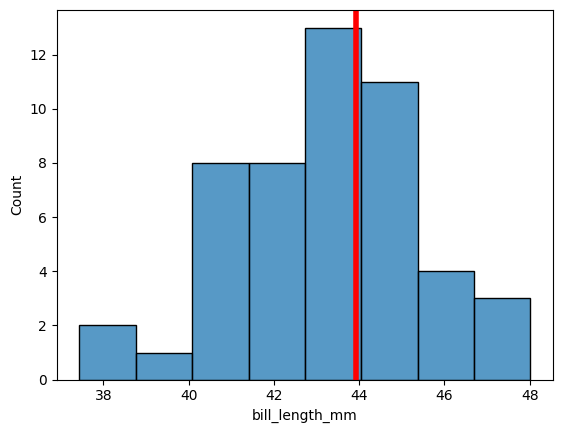

We are 90% confident that the Population mean is between 39.50 mm and 46.75 mm


In [22]:
sns.histplot(data=df_means, x='bill_length_mm')
pop_mean = df['bill_length_mm'].mean(numeric_only=True)
plt.axvline(pop_mean, color='red', linewidth=4)
plt.show()

min = np.percentile(df_means['bill_length_mm'], 5)
max = np.percentile(df_means['bill_length_mm'], 95)
print(f"We are 90% confident that the Population mean is between {min:.2f} mm and {max:.2f} mm")

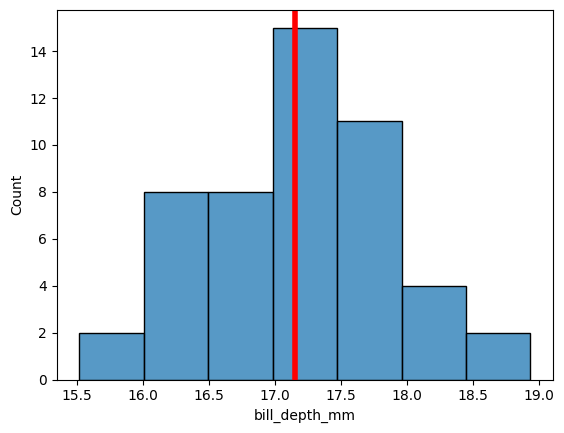

We are 90% confident that the Population mean is between 16.07 mm and 18.30 mm


In [23]:
sns.histplot(data=df_means, x='bill_depth_mm')
pop_mean = df['bill_depth_mm'].mean(numeric_only=True)
plt.axvline(pop_mean, color='red', linewidth=4)
plt.show()

min = np.percentile(df_means['bill_depth_mm'], 5)
max = np.percentile(df_means['bill_depth_mm'], 95)
print(f"We are 90% confident that the Population mean is between {min:.2f} mm and {max:.2f} mm")

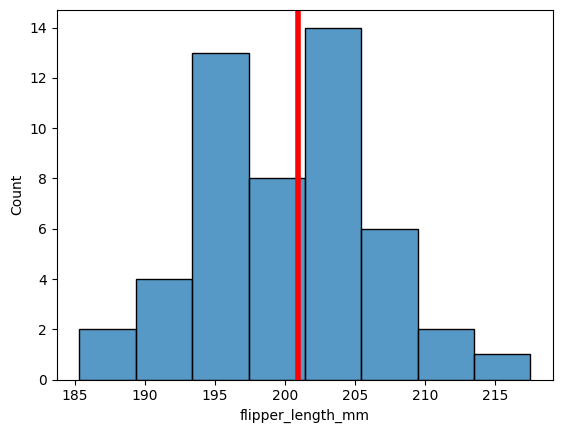

We are 90% confident that the Population mean is between 191.86 mm and 210.07 mm


In [24]:
sns.histplot(data=df_means, x='flipper_length_mm')
pop_mean = df['flipper_length_mm'].mean(numeric_only=True)
plt.axvline(pop_mean, color='red', linewidth=4)
plt.show()

min = np.percentile(df_means['flipper_length_mm'], 5)
max = np.percentile(df_means['flipper_length_mm'], 95)
print(f"We are 90% confident that the Population mean is between {min:.2f} mm and {max:.2f} mm")

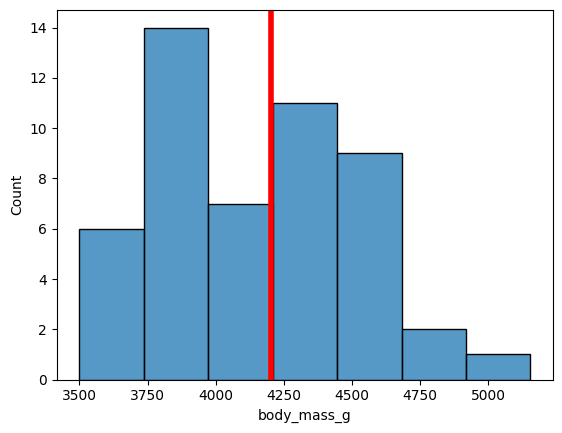

We are 90% confident that the Population mean is between 3642.92 mm and 4698.33 mm


In [25]:
sns.histplot(data=df_means, x='body_mass_g')
pop_mean = df['body_mass_g'].mean(numeric_only=True)
plt.axvline(pop_mean, color='red', linewidth=4)
plt.show()

min = np.percentile(df_means['body_mass_g'], 5)
max = np.percentile(df_means['body_mass_g'], 95)
print(f"We are 90% confident that the Population mean is between {min:.2f} mm and {max:.2f} mm")

Stratified Sampling

<Axes: xlabel='bill_length_mm', ylabel='Count'>

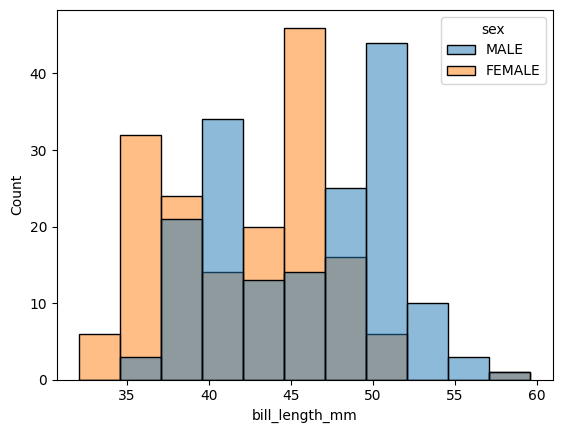

In [26]:
sns.histplot(data=df, x='bill_length_mm', hue='sex')

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

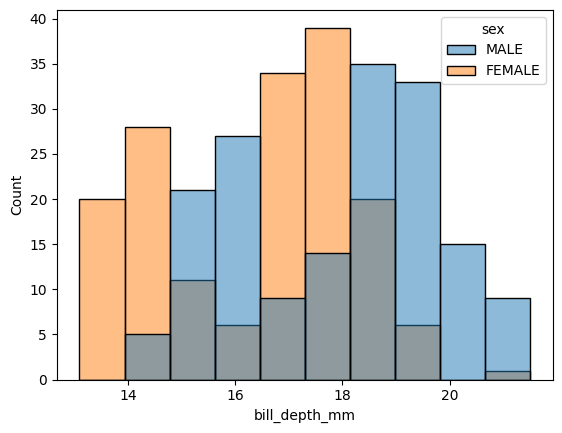

In [27]:
sns.histplot(data=df, x='bill_depth_mm', hue='sex')

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

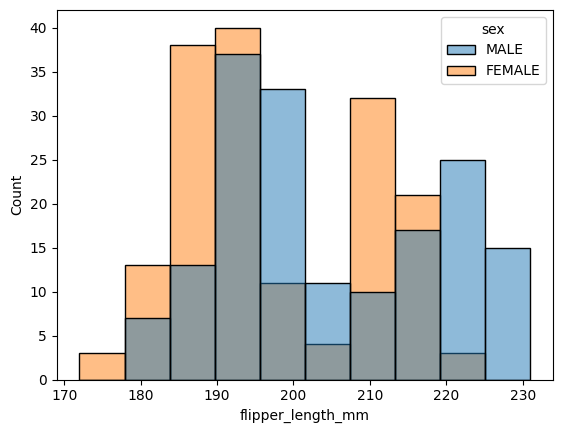

In [28]:
sns.histplot(data=df, x='flipper_length_mm', hue='sex')

<Axes: xlabel='body_mass_g', ylabel='Count'>

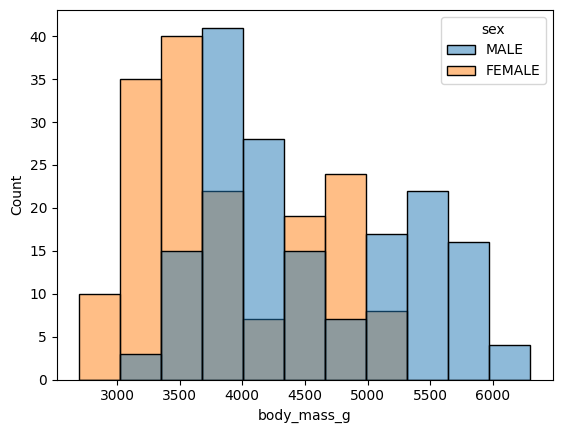

In [29]:
sns.histplot(data=df, x='body_mass_g', hue='sex')

In [30]:
df['sex'] == 'FEMALE'

,sex
0,False
1,True
2,True
3,False
4,True
...,...
339,False
340,True
341,False
342,True


In [31]:
df_f = df[df['sex'] == 'FEMALE']
df_f.shape

(165, 7)

In [32]:
df_m = df[df['sex'] == 'MALE']
df_m.shape

(168, 7)

In [33]:
df_means_f = pd.DataFrame()
df_means_m = pd.DataFrame()

for _ in range(50):
   df_sample_f = df_f.sample(n=sample_size)
   df_sample_m = df_m.sample(n=sample_size)
   series_mean_f = df_sample_f.mean(numeric_only=True)
   series_mean_m = df_sample_m.mean(numeric_only=True)
   df_means_f = pd.concat([df_means_f, series_mean_f], axis=1)
   df_means_m = pd.concat([df_means_m, series_mean_m], axis=1)

In [34]:
df_means_f = df_means_f.T
df_means_m = df_means_m.T

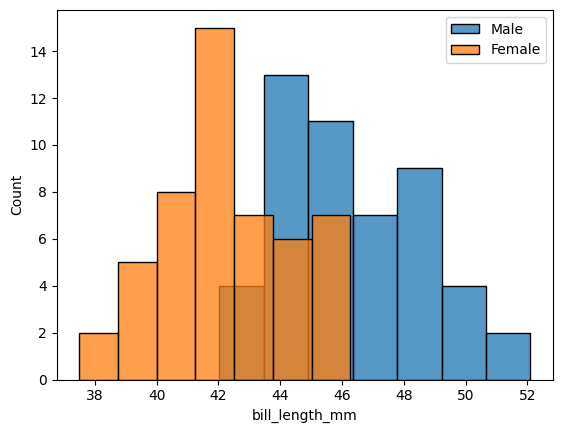

We are 90% confident the Male Population mean is between 43.15 mm and 50.21 mm
We are 90% confident the Female Population mean is between 38.84 mm and 46.14 mm


In [35]:
sns.histplot(data=df_means_m, x='bill_length_mm', label='Male')
sns.histplot(data=df_means_f, x='bill_length_mm', label='Female')
plt.legend()
plt.show()

min_m = np.percentile(df_means_m['bill_length_mm'], 5)
max_m = np.percentile(df_means_m['bill_length_mm'], 95)
print(f"We are 90% confident the Male Population mean is between {min_m:.2f} mm and {max_m:.2f} mm")

min_f = np.percentile(df_means_f['bill_length_mm'], 5)
max_f = np.percentile(df_means_f['bill_length_mm'], 95)
print(f"We are 90% confident the Female Population mean is between {min_f:.2f} mm and {max_f:.2f} mm")

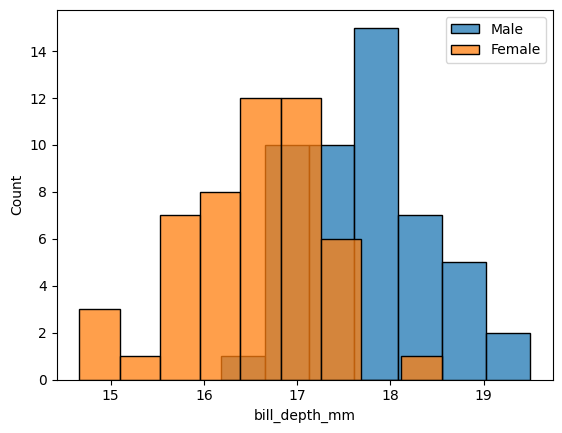

We are 90% confident the Male Population mean is between 16.77 mm and 19.02 mm
We are 90% confident the Female Population mean is between 15.22 mm and 17.57 mm


In [36]:
sns.histplot(data=df_means_m, x='bill_depth_mm', label='Male')
sns.histplot(data=df_means_f, x='bill_depth_mm', label='Female')
plt.legend()
plt.show()

min_m = np.percentile(df_means_m['bill_depth_mm'], 5)
max_m = np.percentile(df_means_m['bill_depth_mm'], 95)
print(f"We are 90% confident the Male Population mean is between {min_m:.2f} mm and {max_m:.2f} mm")

min_f = np.percentile(df_means_f['bill_depth_mm'], 5)
max_f = np.percentile(df_means_f['bill_depth_mm'], 95)
print(f"We are 90% confident the Female Population mean is between {min_f:.2f} mm and {max_f:.2f} mm")

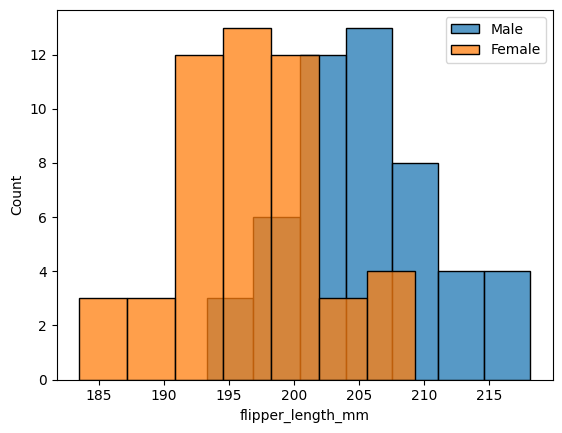

We are 90% confident the Male Population mean is between 196.61 mm and 214.93 mm
We are 90% confident the Female Population mean is between 187.84 mm and 206.93 mm


In [37]:
sns.histplot(data=df_means_m, x='flipper_length_mm', label='Male')
sns.histplot(data=df_means_f, x='flipper_length_mm', label='Female')
plt.legend()
plt.show()

min_m = np.percentile(df_means_m['flipper_length_mm'], 5)
max_m = np.percentile(df_means_m['flipper_length_mm'], 95)
print(f"We are 90% confident the Male Population mean is between {min_m:.2f} mm and {max_m:.2f} mm")

min_f = np.percentile(df_means_f['flipper_length_mm'], 5)
max_f = np.percentile(df_means_f['flipper_length_mm'], 95)
print(f"We are 90% confident the Female Population mean is between {min_f:.2f} mm and {max_f:.2f} mm")

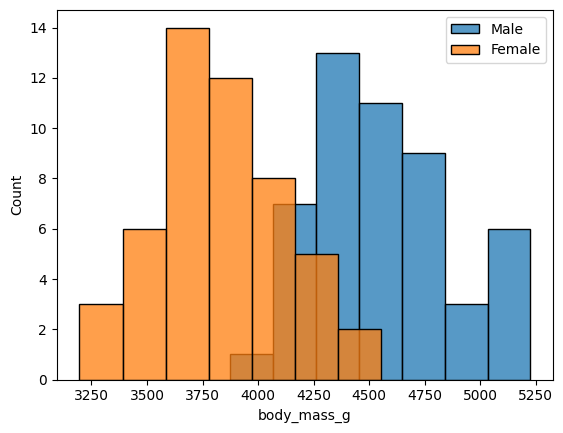

We are 90% confident the Male Population mean is between 4163.54 mm and 5082.08 mm
We are 90% confident the Female Population mean is between 3389.38 mm and 4321.25 mm


In [38]:
sns.histplot(data=df_means_m, x='body_mass_g', label='Male')
sns.histplot(data=df_means_f, x='body_mass_g', label='Female')
plt.legend()
plt.show()

min_m = np.percentile(df_means_m['body_mass_g'], 5)
max_m = np.percentile(df_means_m['body_mass_g'], 95)
print(f"We are 90% confident the Male Population mean is between {min_m:.2f} mm and {max_m:.2f} mm")

min_f = np.percentile(df_means_f['body_mass_g'], 5)
max_f = np.percentile(df_means_f['body_mass_g'], 95)
print(f"We are 90% confident the Female Population mean is between {min_f:.2f} mm and {max_f:.2f} mm")

Do our features have association ?

In [39]:
df.corr(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


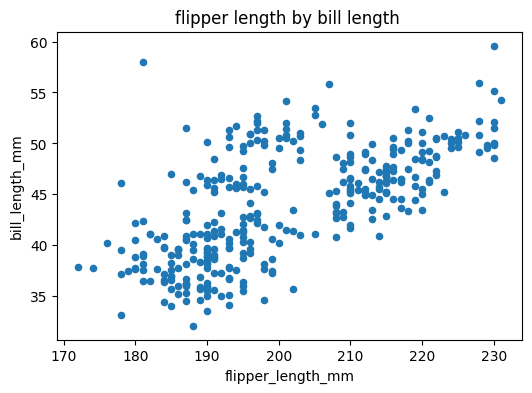

In [66]:
df.plot(kind='scatter', x='flipper_length_mm', y='bill_length_mm',
        title= "flipper length by bill length ", figsize=(6,4))
plt.show()

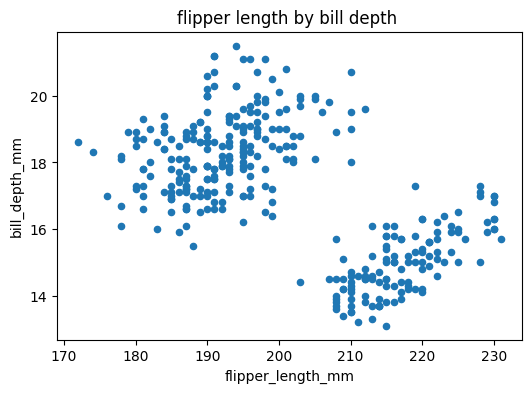

In [67]:
df.plot(kind='scatter', x='flipper_length_mm', y='bill_depth_mm',
        title= "flipper length by bill depth ", figsize=(6,4))
plt.show()

In [44]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Proportion of each penguin type live on each island

In [47]:
df.groupby(['island', 'species']).count()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie                 44             44                 44   
          Gentoo                123            123                123   
Dream     Adelie                 56             56                 56   
          Chinstrap              68             68                 68   
Torgersen Adelie                 51             51                 51   

                     body_mass_g  sex  
island    species                      
Biscoe    Adelie              44   44  
          Gentoo             123  119  
Dream     Adelie              56   55  
          Chinstrap           68   68  
Torgersen Adelie              51   47

<Axes: ylabel='sex'>

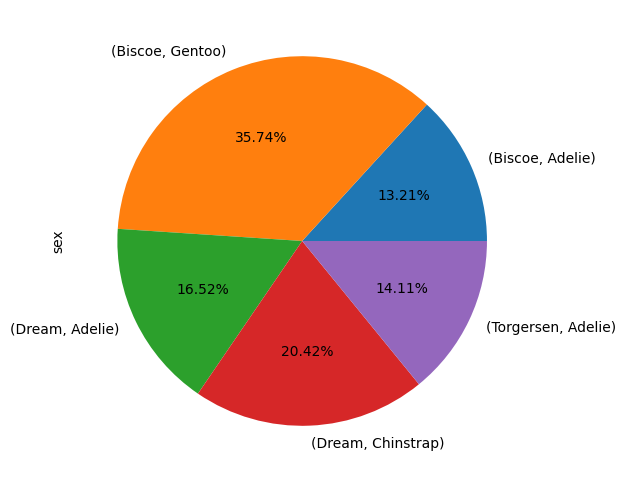

In [53]:
df.groupby(['island', 'species']).count()['sex'].plot(kind='pie',autopct='%.2f%%', figsize=(10,6))

<Axes: title={'center': 'Penguins per Island'}, ylabel='sex'>

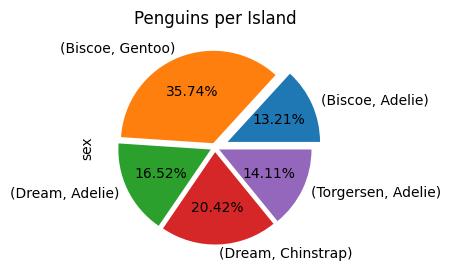

In [58]:
df.groupby(['island', 'species']).count()['sex'].plot(kind='pie',autopct='%.2f%%', title="Penguins per Island",explode=[.15, .05, .05, .05, .05], figsize=(4,3))

Text(0, 0.5, '')

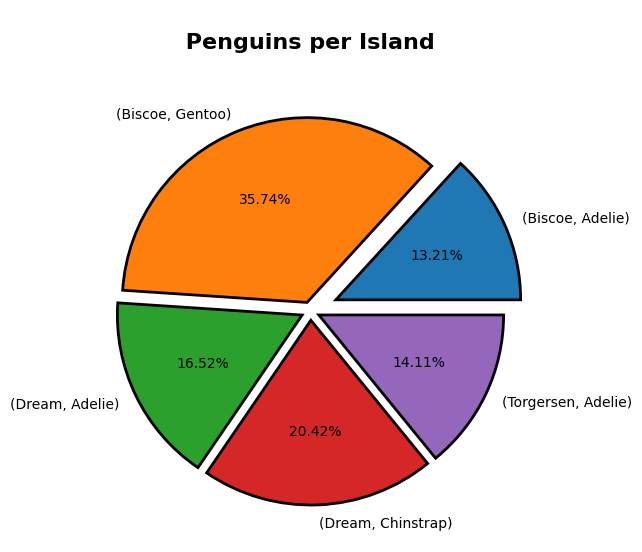

In [63]:
ax = df.groupby(['island', 'species']).count()['sex'].plot(kind='pie',autopct='%.2f%%', explode=[.15, .05, .05, .05, .05], figsize=(10,6))

for w in ax.patches:
    w.set_edgecolor('black')
    w.set_linewidth(2)
    
plt.title("\n Penguins per Island \n", fontsize=16, fontweight='bold')
ax.set_ylabel('') # to remove the ylabel